<a href="https://colab.research.google.com/github/bernardobdp/SIM_YAC_PRUDENTE_UPSE2023/blob/main/explicita_implicita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

In [2]:
L=10000 # logintud del reservorio
dx=2500
Tiempo=100000
Dt=1
k=50 # permeabilidad en milidarci
por=0.2 #porosidad
vis=1 #viscocidad centipoise
Beta=1 # factor volumetrico
CompTotal=1**(-6) #ps1-1 compresibilidad
A=200000 #ft^2


In [3]:
#antes debemos calcular la ecuacion de la difusividad
#consideramos el valor de alpha

In [4]:
Alpha=k/(vis*por*CompTotal)
Alpha
Eta=(Alpha*Dt)/(dx**2)   #parte de la ecuacion explicita
Eta                      #landa o n  eta debe ser menor a 0,5 para que el sistema sea estable

4e-05

In [5]:
#ESQUEMA EXPLICITO

In [6]:

def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-2*P1+P2) #ecuacion del metodo explicito
  return(Pdt)
#creamos nuestra matriz tendra el numero de nodos, columnas y filas
Pexplicita=np.zeros((Tiempo//Dt,L//dx))
#Tiempo//Dt division de las filas  L//dx division exacta para las columnas

In [7]:
Pexplicita.shape

(100000, 4)

In [8]:
#Condiciones iniciales
Pyac=1000
Piz=2000
Pder=0
Pin=np.ones(L//dx)#primer vector que tendra las condiciones iniciales
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz # sera la primera celda
Pin[len(Pin)-1]=Pder #ultima celda longitud de toda esta celda menos 1
Pin

array([2000., 1000., 1000.,    0.])

In [9]:
#calculo
t=Dt
Pexplicita[0]=Pin
Pexplicita.shape
while t<Tiempo:#ciclo en base al  tiempo lenara fila 1,2,3,4
  for i in range(0,len(Pin)-1): #ciclo de espacio nodo1,2,3,4
    if i==0:
      Pres[i]=Pin[0] #presion incial que empieza en 0
    elif i==len(Pin)-1:# calculo de la longitud
      Pres[i]=Pin[len(Pin)-1] #se toma los puntos de los extremos
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta) #para calcular el resto de valores
                          #llamamos a la funcion para calcular las presiones futuras
  Pexplicita[t//Dt]=Pres #llena las filas
  t=t+Dt
  Pin=Pres
#solucion explicita solucion con un sistema de ecuaciones


In [10]:
Pexplicita

array([[2000.        , 1000.        , 1000.        ,    0.        ],
       [2000.        , 1000.04      ,  999.96      ,    0.        ],
       [2000.        , 1000.0799952 ,  999.9200064 ,    0.        ],
       ...,
       [2000.        , 1333.33146859,  666.66889757,    0.        ],
       [2000.        , 1333.33146883,  666.66889732,    0.        ],
       [2000.        , 1333.33146907,  666.66889706,    0.        ]])

In [ ]:
#ESQUEMA IMPLICITA

In [19]:
Pimplicita=np.zeros((Tiempo//Dt,L//dx)) #crear matriz que va a tener los resultados

Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx  # calculo del numero de nodos
Matriz_resolucion=np.zeros([N-2,N-2]) #matriz para resolver el sistema de ecuaciones
#N-2 son las dimensiones son una matriz cuadrada matriz resolucion tiene 2 nodos menos

In [20]:
for i in range(N-2): #Matriz de resolucion
  Matriz_resolucion[i,i]=1+2*Eta #porque la diagonal de los indices son iguales a i y j posion de la diagonal
  if i>0:
    Matriz_resolucion[i,i-1]=-Eta # llena todas las casillas de la izquierda
  if i<(N-3):
    Matriz_resolucion[i,i+1]=-Eta #llena todas las casillas de la derecha


In [21]:
Pcal=np.zeros([N-2]) #crea un vector vacio donde guardara valores de N-2
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1]) #agarrando los valores iniciales

In [23]:
Pcal

array([999.9600016, 999.9600016])

In [24]:
Pres=np.concatenate(([Piz],Pcal,[Pder])) #condiciones de fronteras o valores de fronteras
Pres

array([2000.       ,  999.9600016,  999.9600016,    0.       ])

In [27]:
Pimplicita[0]=Pin
t=Dt
while t<Tiempo: #se crea un ciclo en el tiempo
    Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1]) #resuelve sistema lineal de matrices
    Pres=np.concatenate(([Piz],Pcal,[Pder])) #presion de resultado
    Pimplicita[t//Dt]=Pres
    Pin=Pres
    t=t+Dt

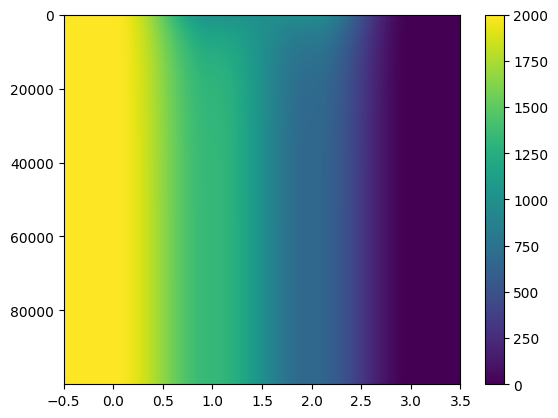

In [28]:
import matplotlib.pyplot as plt
imgplot=plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

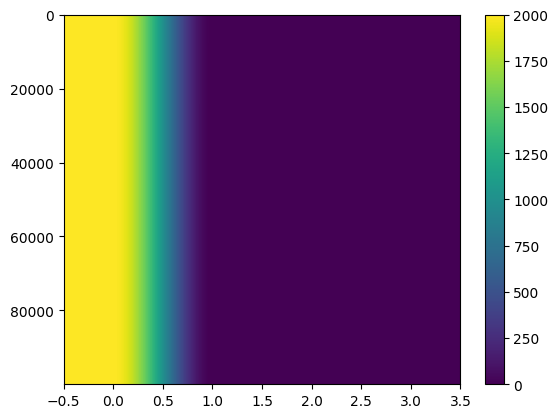

In [29]:
import matplotlib.pyplot as plt
imgplot=plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()